In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
import sys
sys.path.append("../figures")

from where_copie import RetinaFill, CollFill, WhereShift, RetinaBackground, RetinaMask, RetinaWhiten, TransformDico
from where_copie import RetinaTransform, WhereNet, CollTransform, MNIST, Normalize, WhereTrainer, Where

In [5]:
from main import init
args = init(filename='../data/2019-06-13')
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-13',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True}

In [6]:
from retina_copie import Retina
retina = Retina(args)

../tmp/retina_6_24_10_2_1.41_128_dico.npy
Creation du dictionnaire de filtres en cours...
Dico cree
len finale 6 2 10 24 64
Fichier retina_dico ecrit et sauvegarde avec succes
../tmp/retina_6_24_10_2_1.41_128_transform.npy
Fichier retina_transform charge avec succes
../tmp/retina_6_24_10_2_1.41_128_inverse_transform.npy
Fichier retina_inverse_transform charge avec succes


In [7]:
accuracy_map = np.loadtxt('../dev/AccuracyMap_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-12_16h11.txt', max_rows=55)

In [8]:
accuracy_map.min()

0.0565

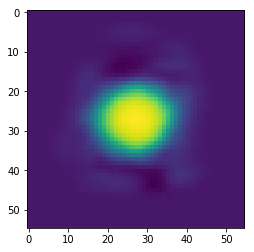

In [9]:
plt.imshow(accuracy_map)

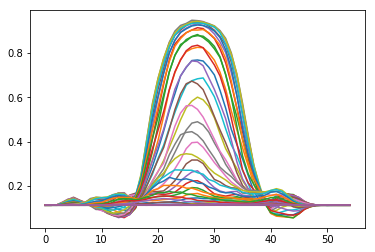

In [10]:
_ = plt.plot(accuracy_map)

## Unit tests

In [11]:
import math

In [12]:
i_offset = -18 #None #
j_offset = 18 #None #

In [13]:
args.contrast = 0.5

In [14]:
transform=transforms.Compose([
                               RetinaFill(N_pic=args.N_pic),
                               #WhereShift(args, theta=3*math.pi/4), 
                               #WhereShift(args, radius = 18), 
                               WhereShift(args, i_offset=i_offset, j_offset=j_offset),
                               RetinaBackground( contrast=args.contrast,
                                                 noise=args.noise,
                                                 sf_0=args.sf_0,
                                                 B_sf=args.B_sf),
                               RetinaMask(N_pic=args.N_pic),
                               RetinaWhiten(N_pic=args.N_pic),
                               TransformDico(retina),
                               #Normalize()
                           ])

In [15]:
target_transform=transforms.Compose([
                               CollFill(accuracy_map=accuracy_map, N_pic=args.N_pic),
                               #WhereShift(args, theta=3*math.pi/4, baseline = 0.1),
                               #WhereShift(args, radius = 18, baseline = 0.1),
                               WhereShift(args, i_offset=i_offset, j_offset=j_offset, baseline = 0.1),
                               CollTransform(retina.colliculus_transform_vector),
                           ])

In [16]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        #target_transform = target_transform,
                        )

In [17]:
len(dataset_train)

60000

In [18]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [19]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        #target_transform = target_transform,
                        )

In [20]:
len(dataset_test)

10000

In [21]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [22]:
import datetime
debut = datetime.datetime.now()

data, label = next(iter(train_loader))

fin = datetime.datetime.now()
print("Duree d'execution", fin-debut)

Duree d'execution 0:00:13.837225


In [23]:
data.shape

torch.Size([100, 2880])

In [24]:
label.shape

torch.Size([100])

In [25]:
print(data[0])

tensor([ 0.0255, -0.0447,  0.0879,  ..., -4.1846,  1.5084, -0.3042],
       dtype=torch.float64)


In [2]:
import sys
sys.path.append("../figures")

from where_copie import RetinaFill, CollFill, WhereShift, RetinaBackground, RetinaMask, RetinaWhiten 
from where_copie import RetinaTransform, WhereNet, CollTransform, MNIST, Normalize, WhereTrainer, Where

from main import init
args = init(filename='../data/2019-06-12')

args.epochs = 2
args.save_model = True

where = Where(args)

Training the What model
Train Epoch: 1/2 [0/60000 (0%)]	Loss: 2.302307
Train Epoch: 1/2 [10000/60000 (17%)]	Loss: 2.302468


KeyboardInterrupt: 

In [ ]:
where.test()

## Zone expérimentale

#### Attribut dico

In [ ]:
if False :
    retina_dico = np.load("../tmp/retina_6_24_10_2_1.41_128_dico.npy")
    print(retina_dico.shape)
    

array = np.asarray([0,1,2])
print(array.shape)

In [7]:
class RetinaTest:
    def __init__(self):
        self.init_retinatest_dico()
    def init_retinatest_dico(self):
        self.retinatest_dico = {}
        print(len(self.retinatest_dico))
        for i in range(3):
            self.retinatest_dico[i] = {}
            print(len(self.retinatest_dico))
            for j in range(3,6):
                self.retinatest_dico[i][j] = [2*j, 3*j, 4*j]
                

In [8]:
retinaTest = RetinaTest()

0
1
2
3


In [10]:
print(retinaTest.retinatest_dico)

{0: {3: [6, 9, 12], 4: [8, 12, 16], 5: [10, 15, 20]}, 1: {3: [6, 9, 12], 4: [8, 12, 16], 5: [10, 15, 20]}, 2: {3: [6, 9, 12], 4: [8, 12, 16], 5: [10, 15, 20]}}


In [11]:
print(retinaTest.retinatest_dico[1][4][2])

16


In [12]:
print(len(retinaTest.retinatest_dico))

3
